# TASK #1: PROJECT OVERVIEW

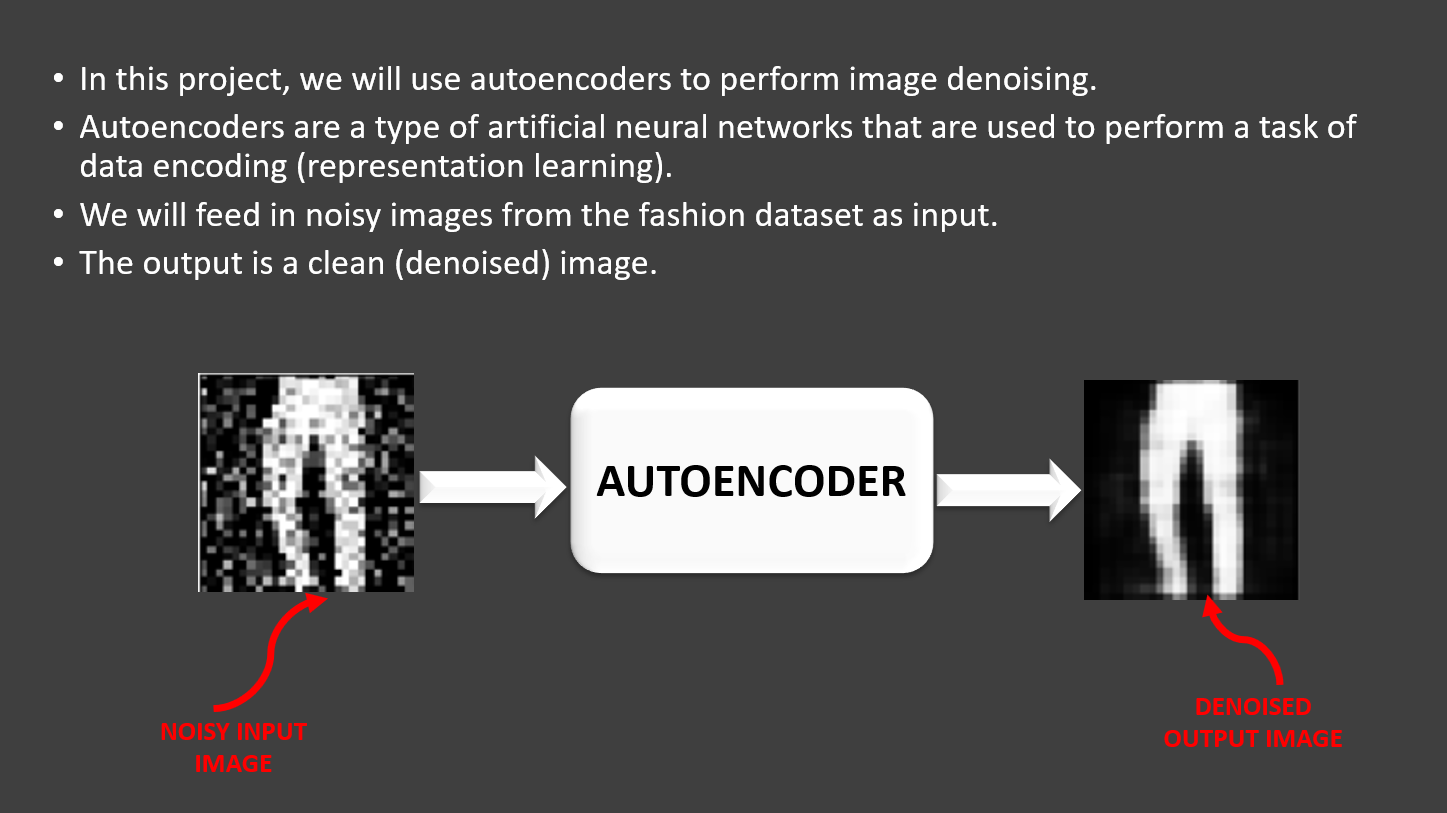

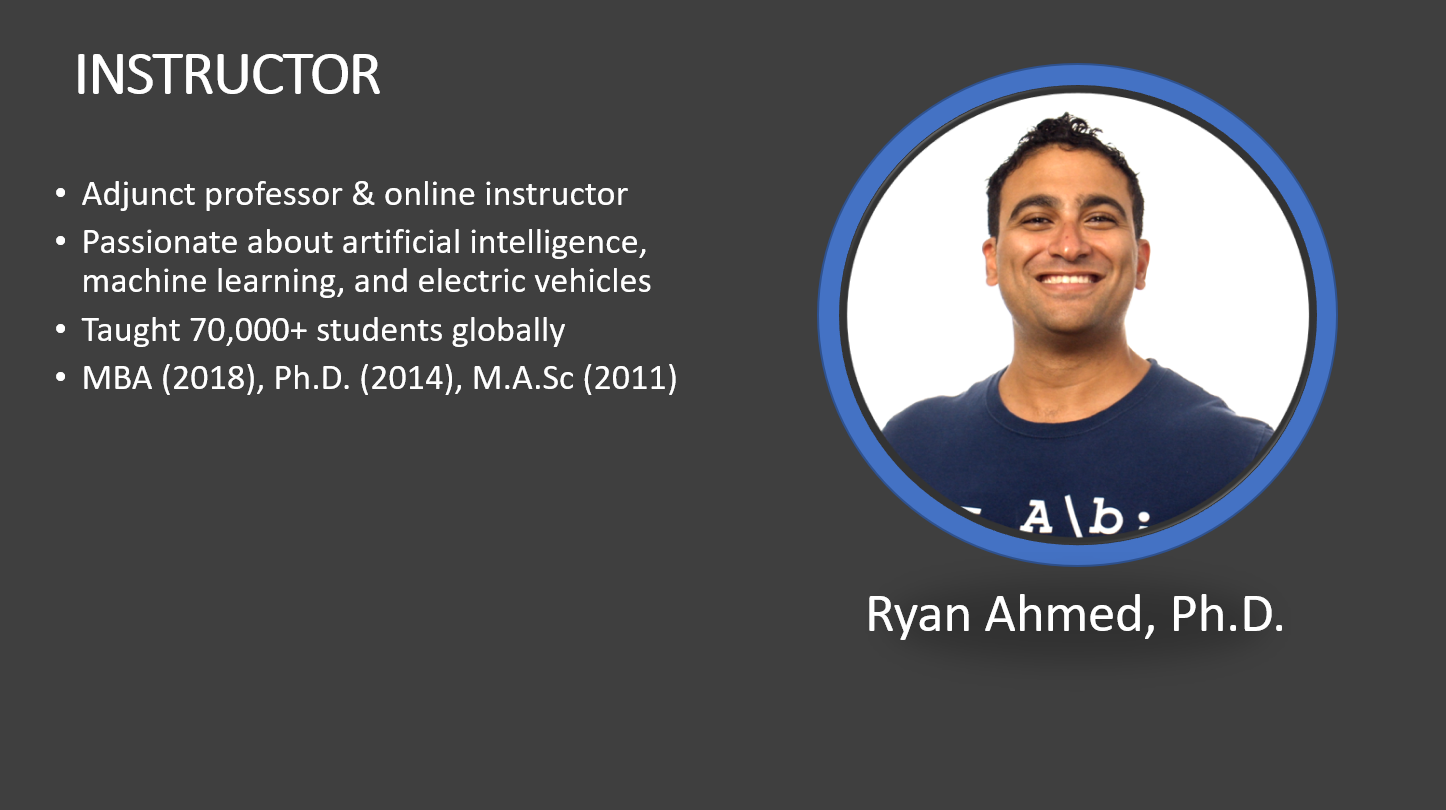

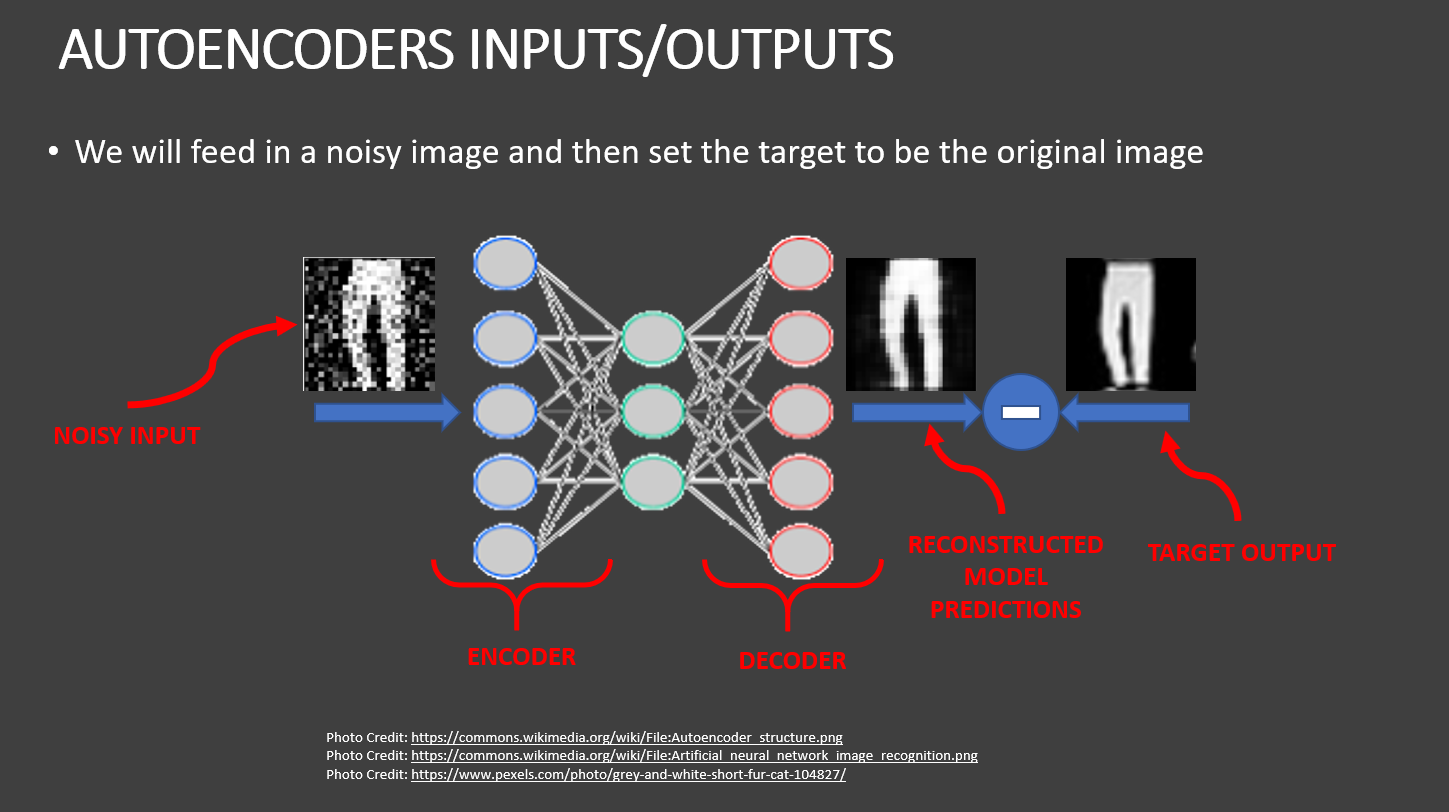

# TASK #2: IMPORT LIBRARIES AND DATASET

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
# Load dataset 
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()


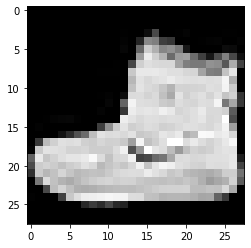

In [4]:
# Visualize a sample image
plt.imshow(X_train[0], cmap = 'gray')

In [5]:
# check out the shape of the training data
X_train.shape

(60000, 28, 28)

In [6]:
# check out the shape of the testing data
X_test.shape

(10000, 28, 28)

# TASK #3: PERFORM DATA VISUALIZATION

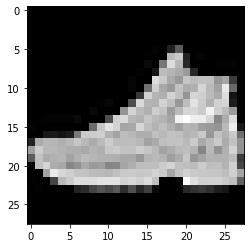

In [12]:
# Let's view some images!
i = random.randint(1,60000)
plt.imshow(X_train[i] , cmap = 'gray')

In [13]:

label = y_train[i]
label

9

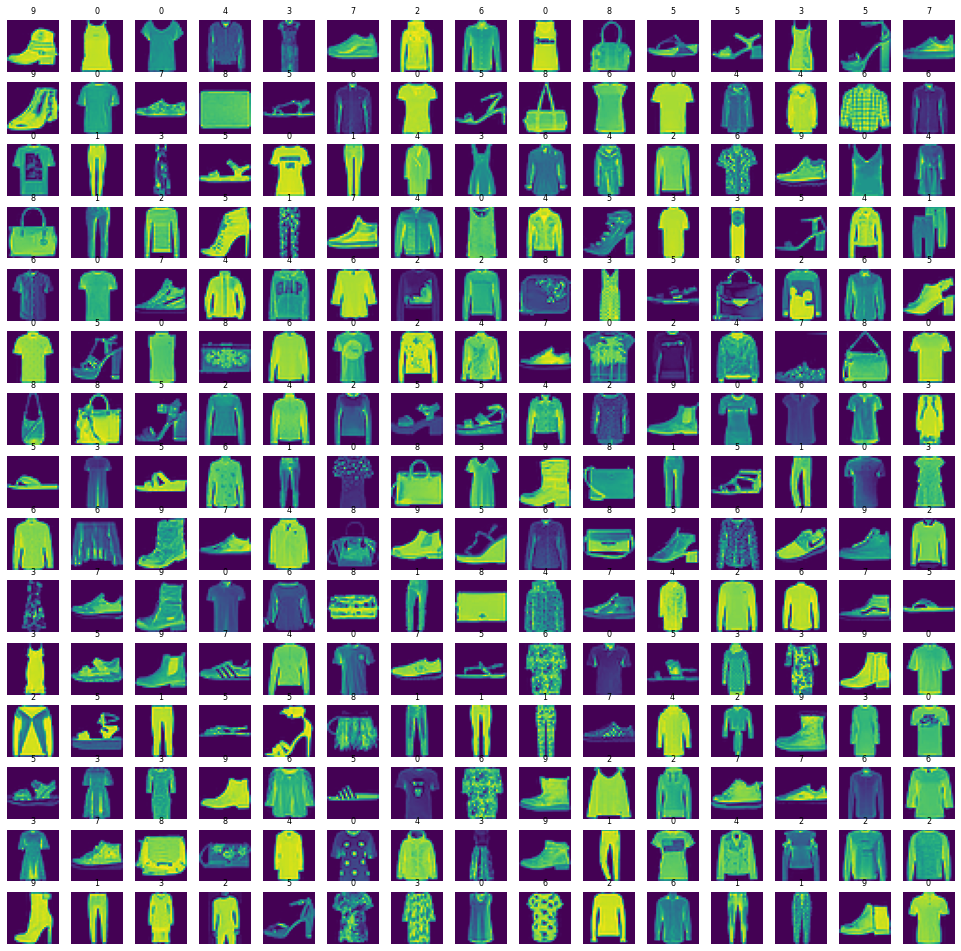

In [16]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0,W_grid * L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize = 8)
    axes[i].axis('off')




# TASK #4: PERFORM DATA PREPROCESSING

In [17]:
# normalize data
X_train = X_train/255
X_test = X_test/255
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [20]:
# add some noise
noise_factor = 0.3

noise_dataset= []
for img in X_train:
    noisy_image= img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image,0,1)
    noise_dataset.append(noisy_image)

In [33]:
noise_dataset = np.array(noise_dataset)

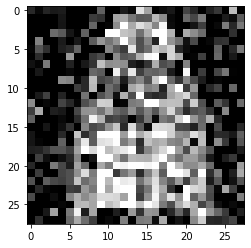

In [22]:
plt.imshow(noise_dataset[22],cmap = 'gray')

In [23]:
noise_factor = 0.1

noise_test_dataset= []
for img in X_test:
    noisy_image= img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image,0,1)
    noise_test_dataset.append(noisy_image)

In [32]:
noise_test_dataset =  np.array(noise_test_dataset)

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

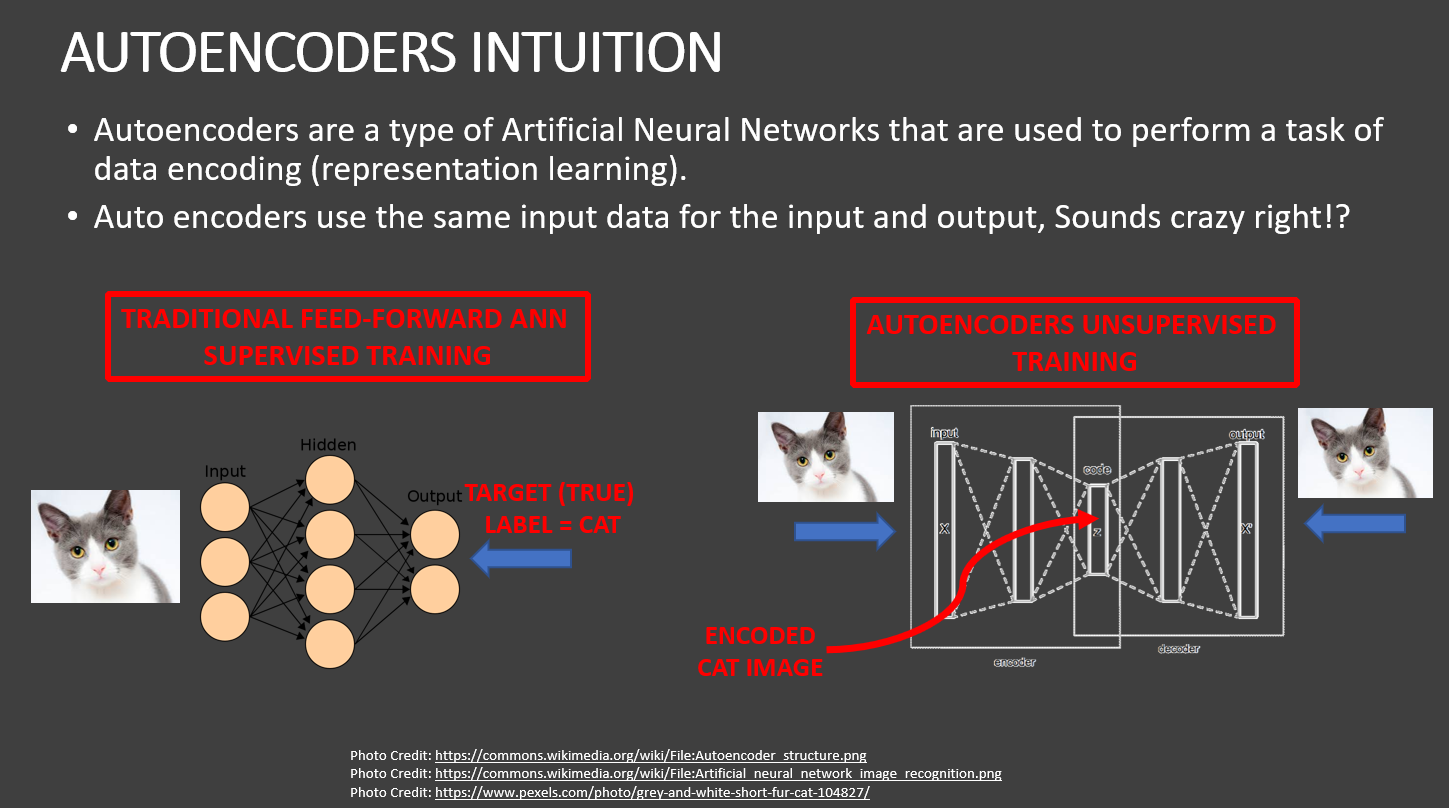

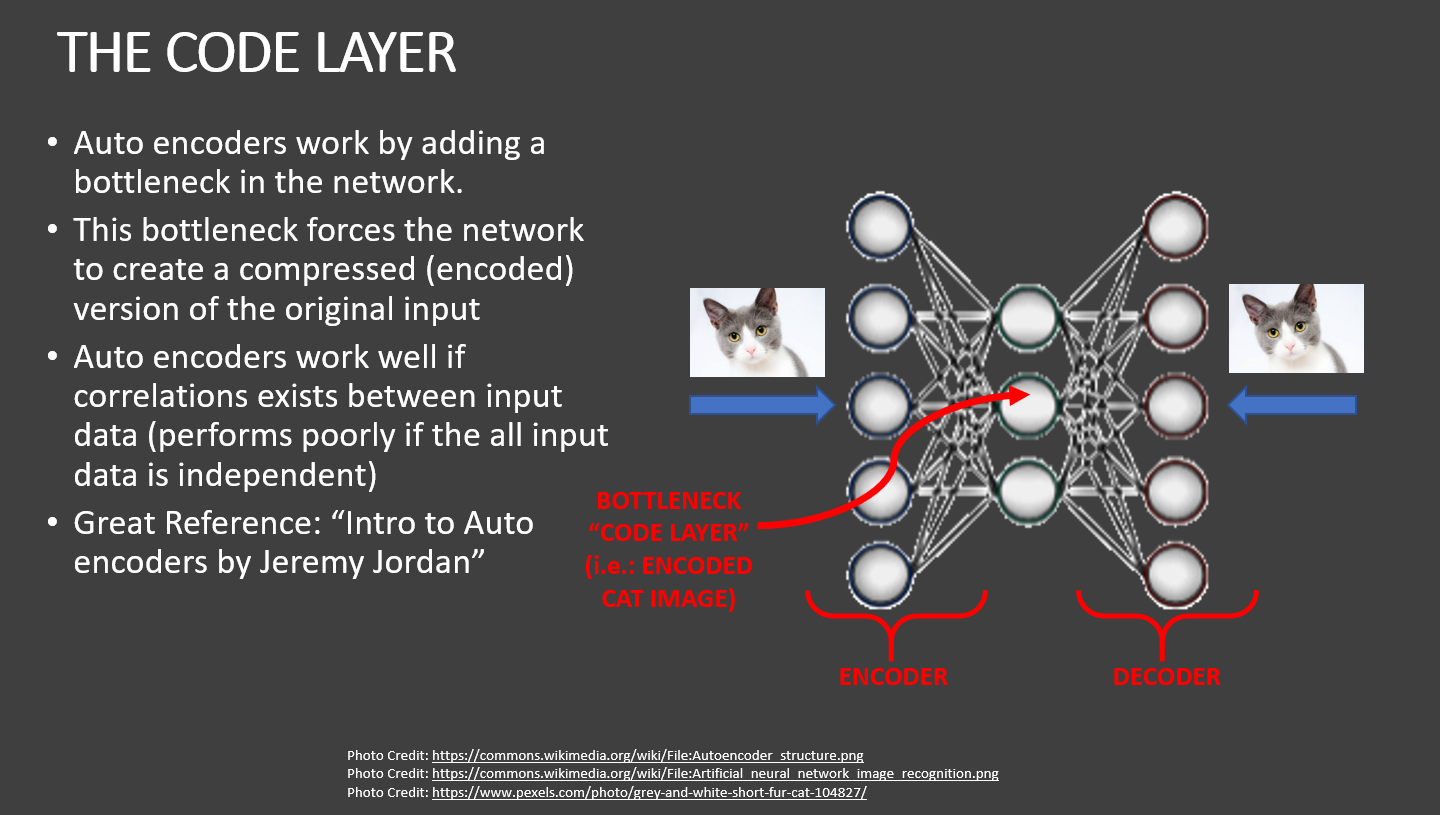

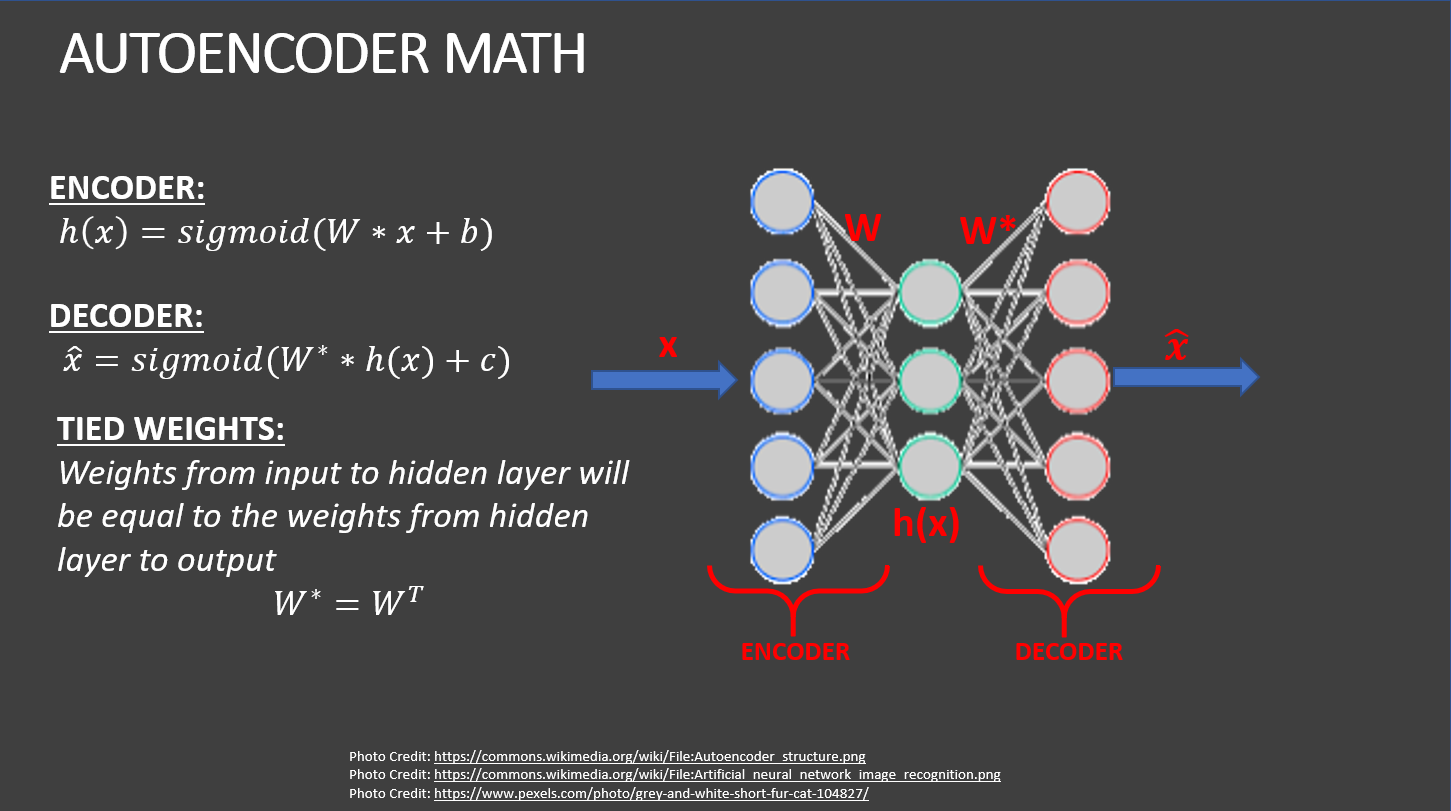

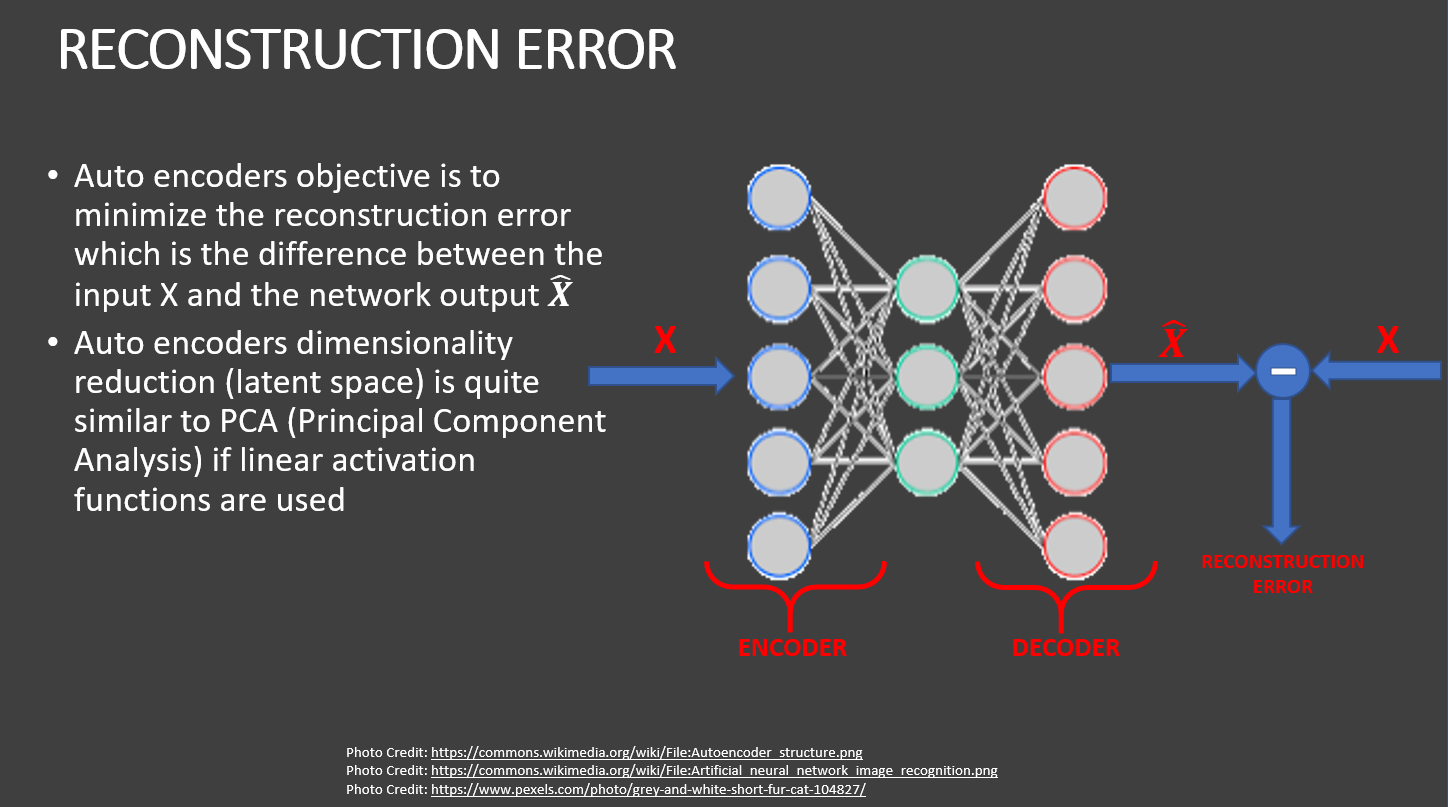

# TASK #6: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [25]:
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(filters = 16 , kernel_size =3 , strides =  2,padding ='same',input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8 , kernel_size =3 , strides =  2,padding ='same'))
                
autoencoder.add(tf.keras.layers.Conv2D(filters = 8 , kernel_size =3 , strides =  1,padding ='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16 , kernel_size =3 , strides =  2,padding ='same'))
autoencoder.add(tf.keras.layers.Conv2D(filters = 1 , kernel_size =3 , strides =  1,activation = 'sigmoid',padding ='same'))

In [35]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [36]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

ValueError: A target array with shape (60000, 28, 28, 1) was passed for an output of shape (None, 14, 14, 1) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.

# TASK #7: EVALUATE TRAINED MODEL PERFORMANCE

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_set[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# EXCELLENT WORK!

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot